In [1]:
!gdown --id 1olQ87hL5vCZeHsefjDPvSDrG8x5Ntb2z

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1olQ87hL5vCZeHsefjDPvSDrG8x5Ntb2z
To: /content/Copy of flight.csv
100% 8.94M/8.94M [00:00<00:00, 24.4MB/s]


# Load Library

In [2]:
#Data manipulation

import pandas as pd
import numpy as np

#Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Warning

import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#Handling Outlier
from scipy import stats
import numpy as np

# Standarization
from sklearn.preprocessing import StandardScaler

#K-Means Clustering
from sklearn.cluster import KMeans

#PCA
from sklearn.decomposition import PCA 

# Load Dataset

In [3]:
df = pd.read_csv('/content/Copy of flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
28465,24346,5/8/2012,5/8/2012,Male,4,HONG KONG,HONG KONG,HK,52.0,3/31/2014,...,4268.0,10096,3/15/2014,17,67.700000,267,0,0.796082,6198,0
62768,50865,2/20/2012,4/27/2012,Female,4,dalian,liaoning,CN,29.0,3/31/2014,...,410.0,1432,10/14/2013,170,178.333333,384,0,0.390000,400,0
27333,59816,3/13/2012,3/13/2012,Male,4,beijing,beijing,CN,69.0,3/31/2014,...,3400.0,10628,7/31/2013,245,50.285714,97,0,0.799177,7735,0
34023,35108,1/1/2013,6/15/2013,Male,4,haerbin,heilongjiang,CN,44.0,3/31/2014,...,5631.0,6238,3/20/2014,12,55.800000,147,0,0.992227,6799,0
31535,51919,10/8/2012,10/8/2012,Male,4,Dongdaemun-gu,Seoul,KR,60.0,3/31/2014,...,0.0,9288,12/22/2012,466,25.000000,63,0,0.750000,3296,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#separating categorical and numerical column
num = df.select_dtypes(include=[np.number]) 
cat = df.select_dtypes(exclude=[np.number])

numerical = num.columns
categorical = cat.columns

print(numerical)
print(categorical)

Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')
Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')


In [8]:
# Descriptive Stat
df[numerical].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [9]:
df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


In [10]:
#Unique values
for i in df.columns:
    print(i,"column's unique values are:",df[i].unique())

MEMBER_NO column's unique values are: [54993 28065 55106 ... 45690 61027 61340]
FFP_DATE column's unique values are: ['11/2/2006' '2/19/2007' '2/1/2007' ... '5/3/2009' '1/25/2010' '5/19/2009']
FIRST_FLIGHT_DATE column's unique values are: ['12/24/2008' '8/3/2007' '8/30/2007' ... '3/30/2014' '3/25/2014'
 '3/24/2014']
GENDER column's unique values are: ['Male' 'Female' nan]
FFP_TIER column's unique values are: [6 5 4]
WORK_CITY column's unique values are: ['.' nan 'Los Angeles' ... 'BELLREGUARD' 'Danville' 'lingshui']
WORK_PROVINCE column's unique values are: ['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR']
WORK_COUNTRY column's unique values are: ['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 'AS' 'IT' 'OM' 'SE' 'BZ' 'IN' 'KZ' 'PT' 'NO' 'MS'
 'FI' 'UZ' 'NE' 'AT' 'AA' 'HU' 'CY' 'EG' 'MA

In [11]:
for col in numerical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom MEMBER_NO:
54993    1
44438    1
45331    1
55783    1
49635    1
        ..
62417    1
33259    1
32017    1
50950    1
61340    1
Name: MEMBER_NO, Length: 62988, dtype: int64

Value count kolom FFP_TIER:
4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

Value count kolom AGE:
47.0     2727
38.0     2713
37.0     2683
42.0     2622
39.0     2595
         ... 
110.0       1
87.0        1
7.0         1
12.0        1
91.0        1
Name: AGE, Length: 84, dtype: int64

Value count kolom FLIGHT_COUNT:
2      10394
3       6477
4       5494
5       4321
6       3676
       ...  
154        1
189        1
117        1
137        1
210        1
Name: FLIGHT_COUNT, Length: 153, dtype: int64

Value count kolom BP_SUM:
0        565
1000     257
700      120
1526     120
2671     105
        ... 
19904      1
19056      1
23867      1
20622      1
503        1
Name: BP_SUM, Length: 23449, dtype: int64

Value count kolom SUM_YR_1:
0.0        9915
960.0       174
690.0

In [12]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liao

## Univariate Analysis

### A. individual displot analysis (numerical)

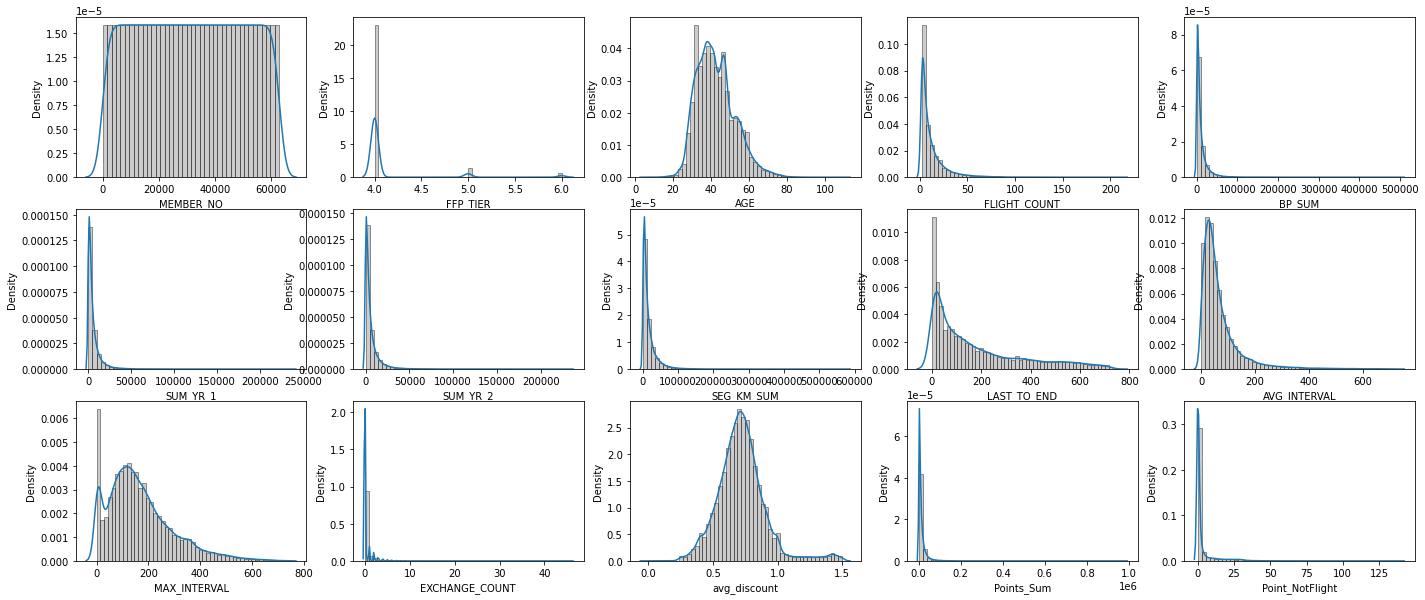

In [13]:
features = numerical 
plt.figure(figsize=(24, 10))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[features[i]],
                 hist_kws={'color' : 'gray', 'edgecolor' : "black"})

### B. individual boxplot analysis (numerical)

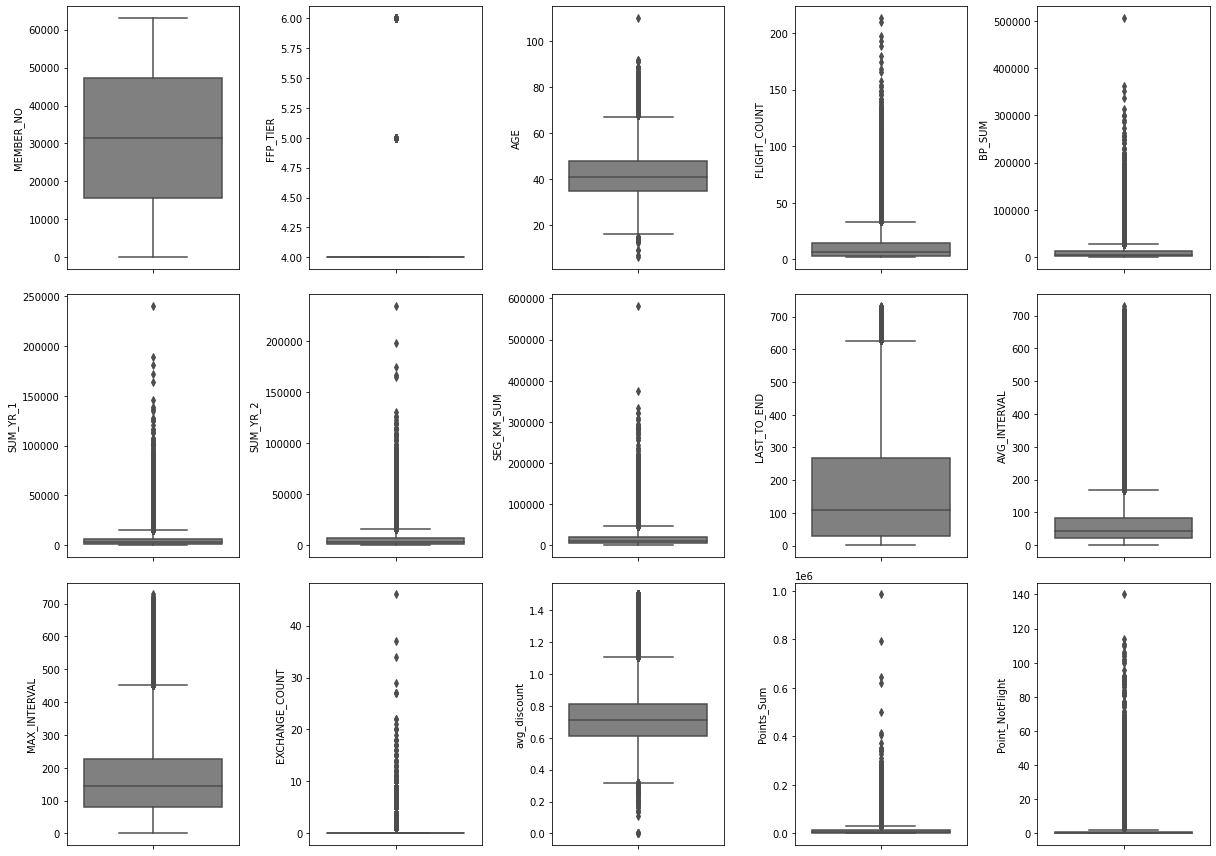

In [14]:
features = numerical
plt.figure(figsize=(17, 12))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='gray')
    plt.tight_layout()

### C. Violin Plot (Numerical)

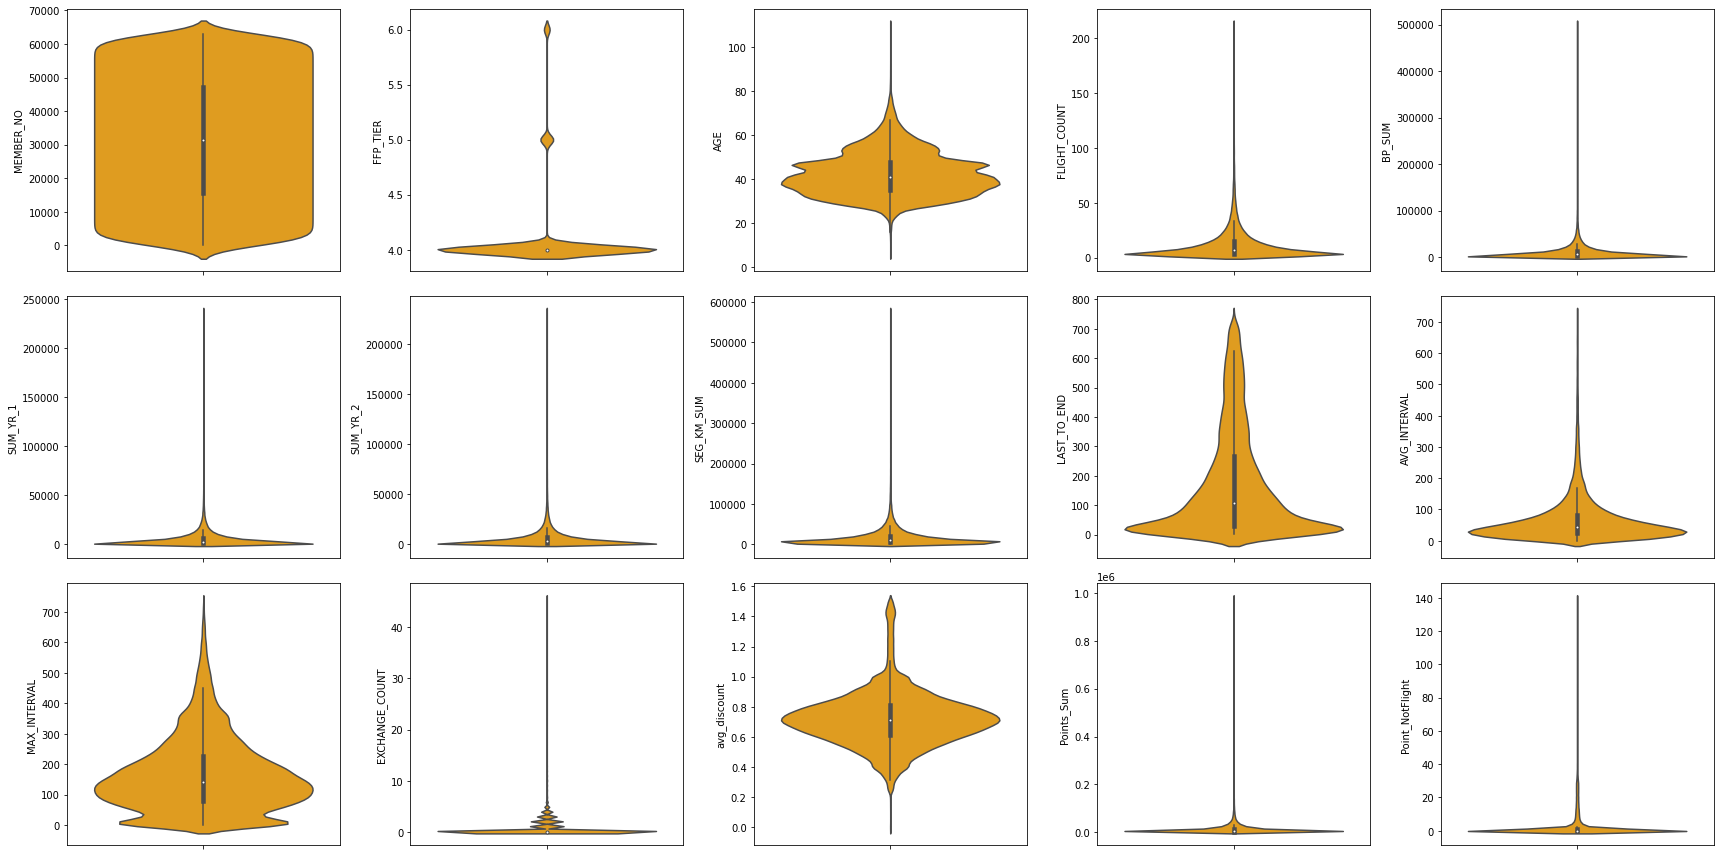

In [15]:
plt.figure(figsize=(24, 12))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[numerical[i]], color='orange', orient='v')
    plt.tight_layout()

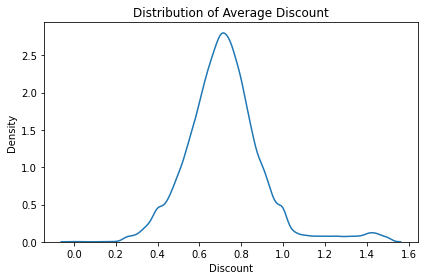

In [16]:
# Melihat kdeplot pada avg_discount
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [17]:
# Hapus Diskon <1 (diatas 100%)
df = df[df['avg_discount']<=1]
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,60041.0,31505.292833,18191.245419,1.0,15736.000000,31528.00000,47269.000000,62988.0
FFP_TIER,60041.0,4.081727,0.328371,4.0,4.000000,4.00000,4.000000,6.0
AGE,59652.0,42.174797,9.771595,6.0,35.000000,41.00000,48.000000,110.0
FLIGHT_COUNT,60041.0,11.654220,13.756290,2.0,3.000000,7.00000,14.000000,210.0
BP_SUM,60041.0,10034.104778,14010.728738,0.0,2432.000000,5457.00000,12133.000000,505308.0
SUM_YR_1,59499.0,4974.437205,7059.121002,0.0,968.000000,2700.00000,6285.500000,239560.0
SUM_YR_2,59907.0,5210.832374,7667.312231,0.0,755.000000,2676.00000,6531.000000,234188.0
SEG_KM_SUM,60041.0,16772.027931,20335.635374,368.0,4713.000000,9878.00000,20893.000000,580717.0
LAST_TO_END,60041.0,177.260855,184.117824,1.0,30.000000,109.00000,270.000000,731.0
AVG_INTERVAL,60041.0,67.875748,77.374097,0.0,23.500000,44.87500,82.400000,728.0


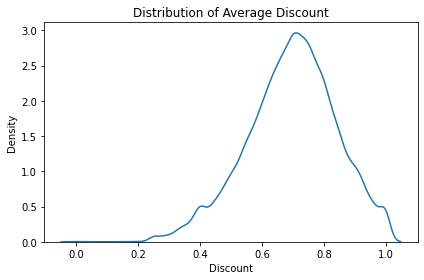

In [18]:
# Cek kdeplot avg_discount
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

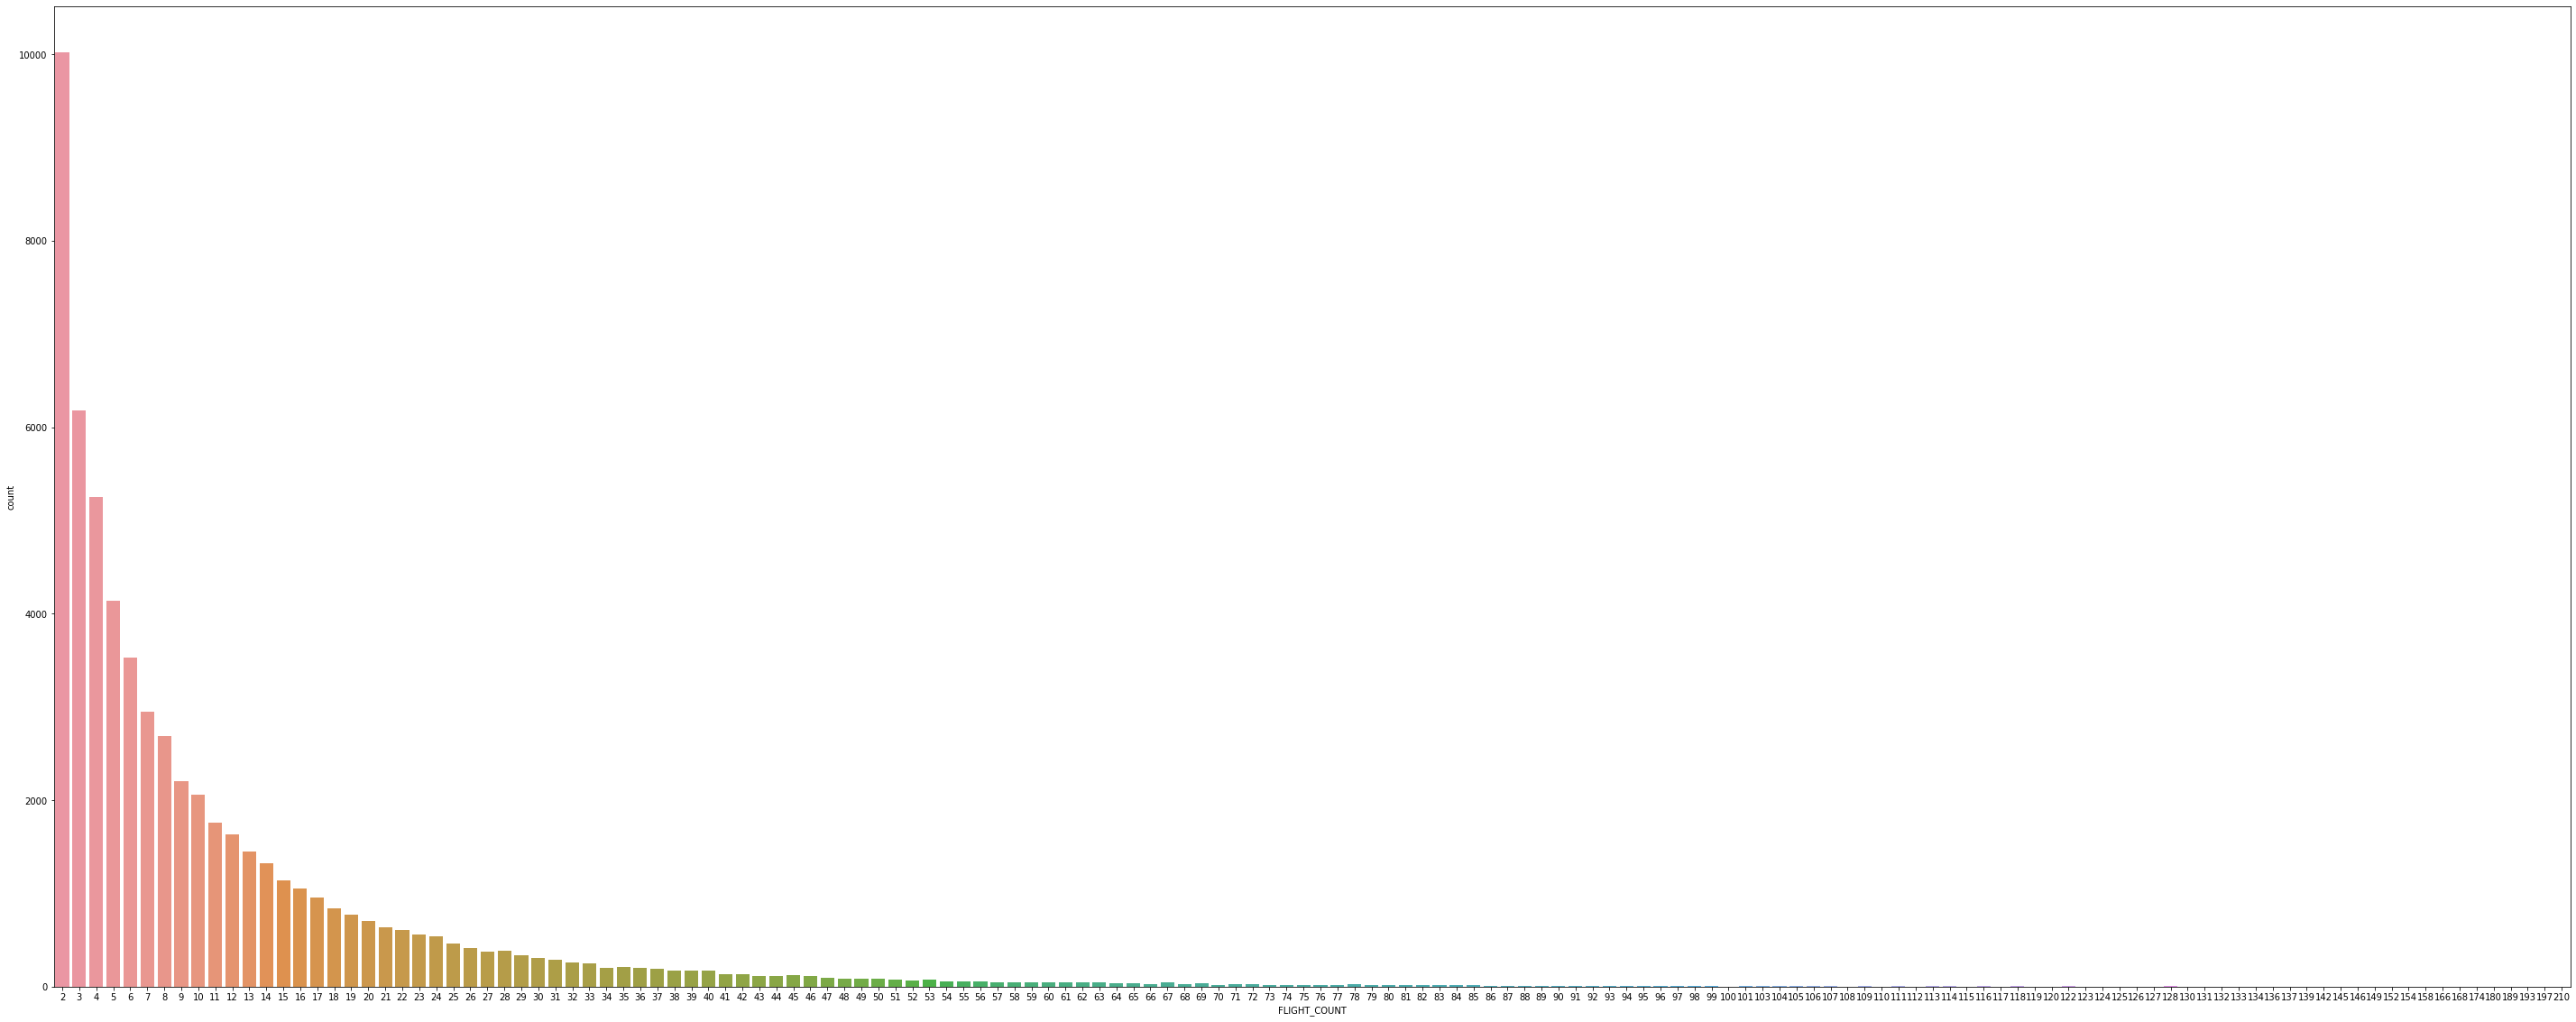

In [19]:
plt.figure(figsize=(50,20))
ax = sns.countplot(x=df["FLIGHT_COUNT"])

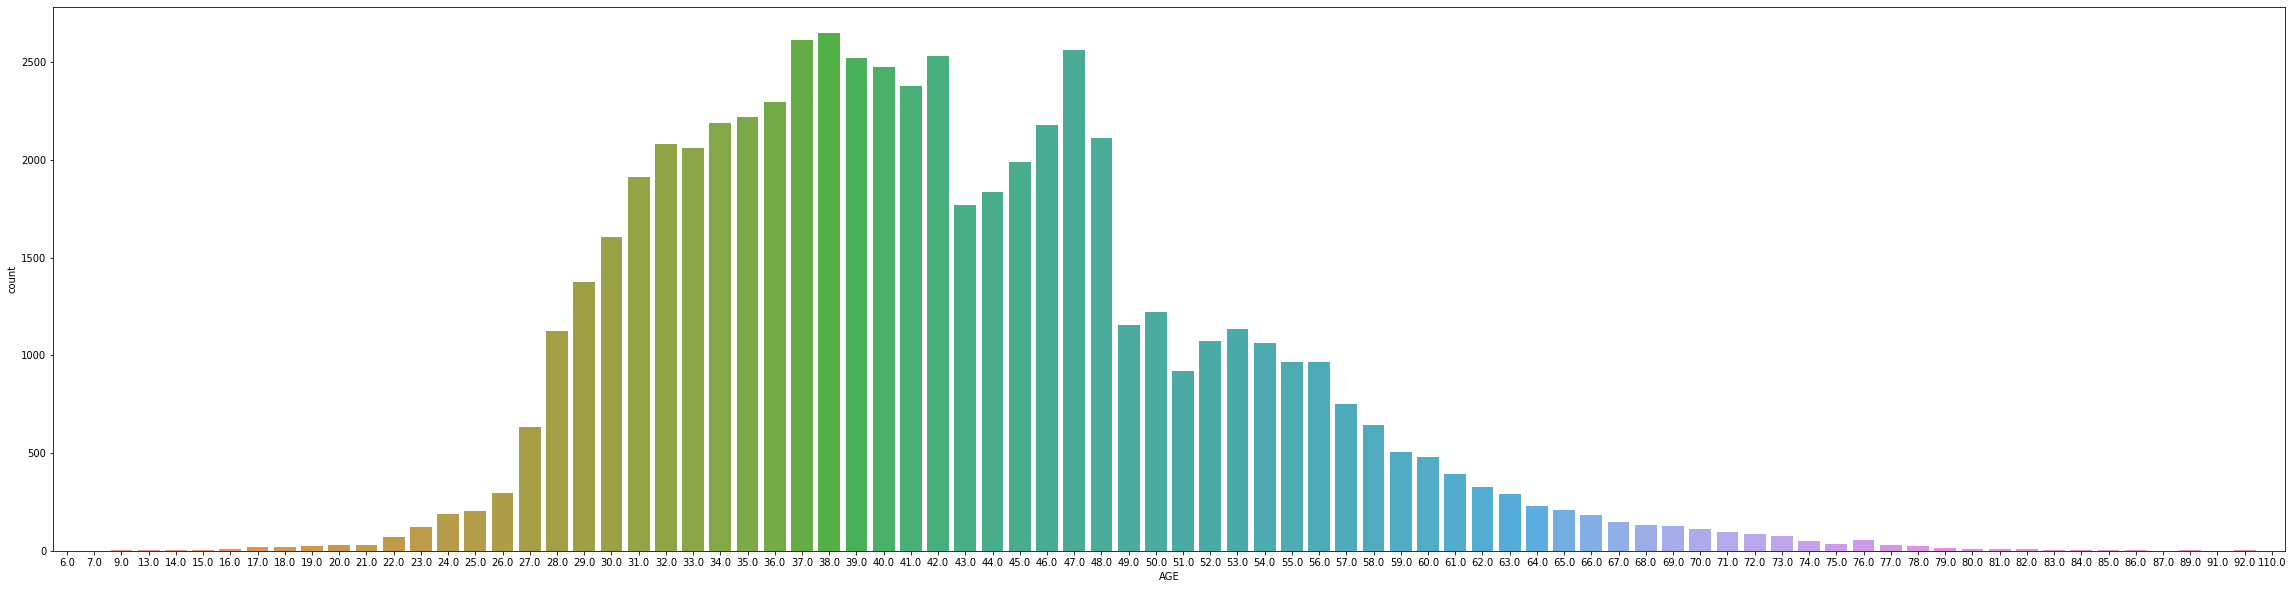

In [20]:
plt.figure(figsize=(40,10))
ax = sns.countplot(x=df["AGE"])

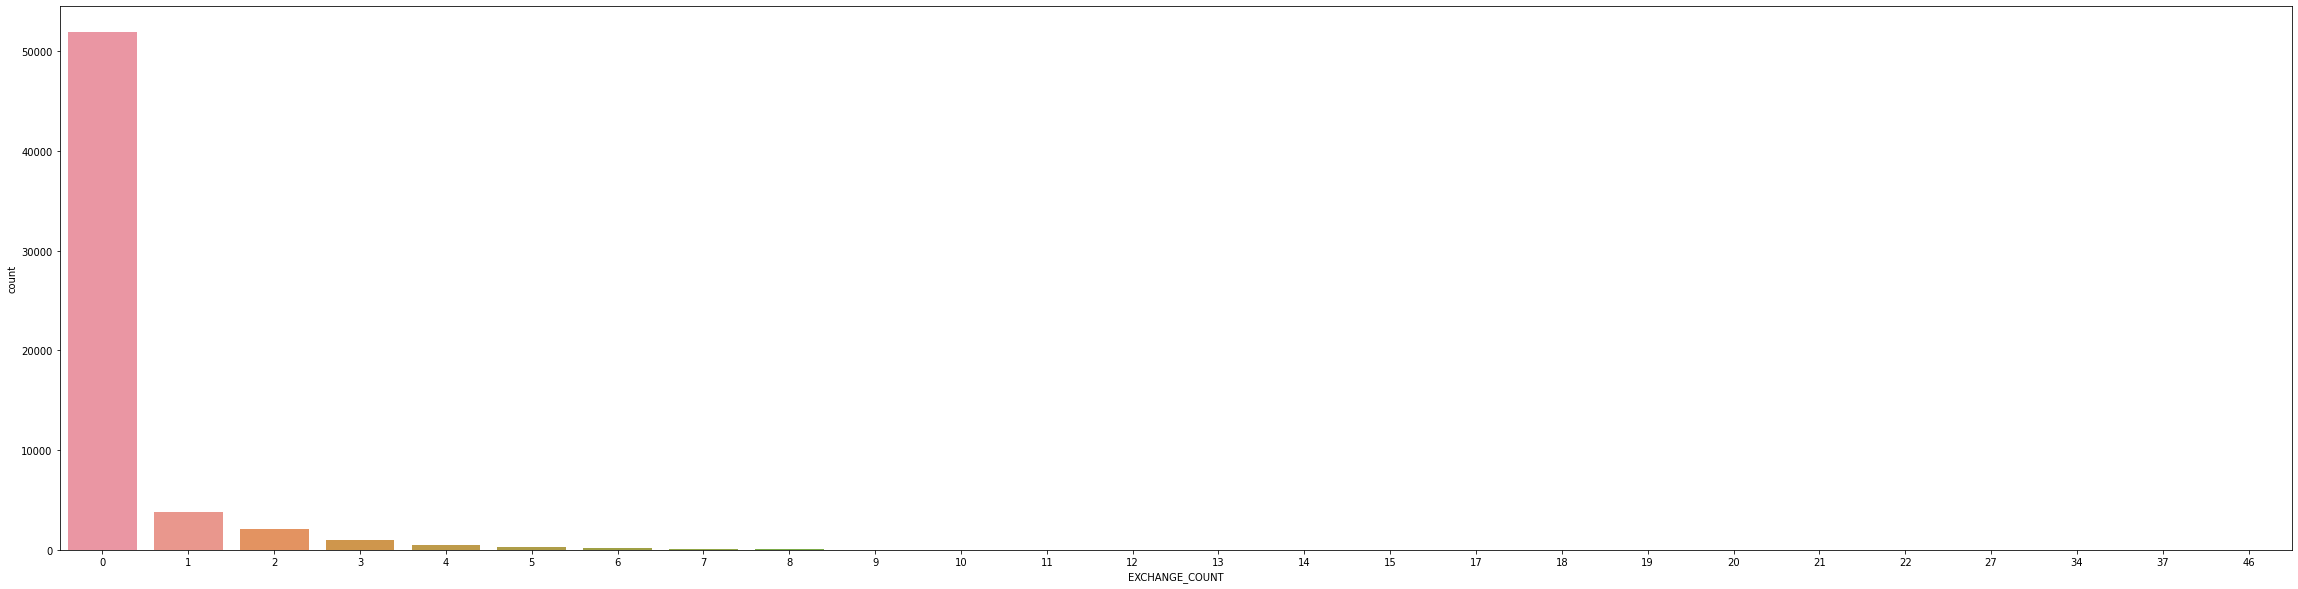

In [21]:
plt.figure(figsize=(40,10))
ax = sns.countplot(x=df["EXCHANGE_COUNT"])

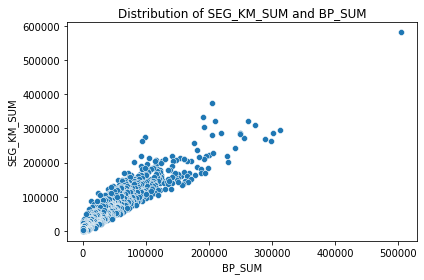

In [22]:
ax = sns.scatterplot(x = 'BP_SUM', y = 'SEG_KM_SUM',  data=df)
ax.set_title("Distribution of SEG_KM_SUM and BP_SUM")
ax.set_ylabel("SEG_KM_SUM")
ax.set_xlabel("BP_SUM")
plt.tight_layout()

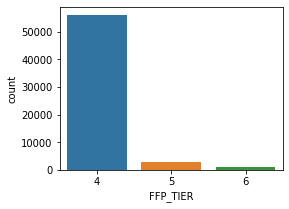

In [23]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x=df["FFP_TIER"])

## Multivariate Analysis

### A. Heatmap

<AxesSubplot:>

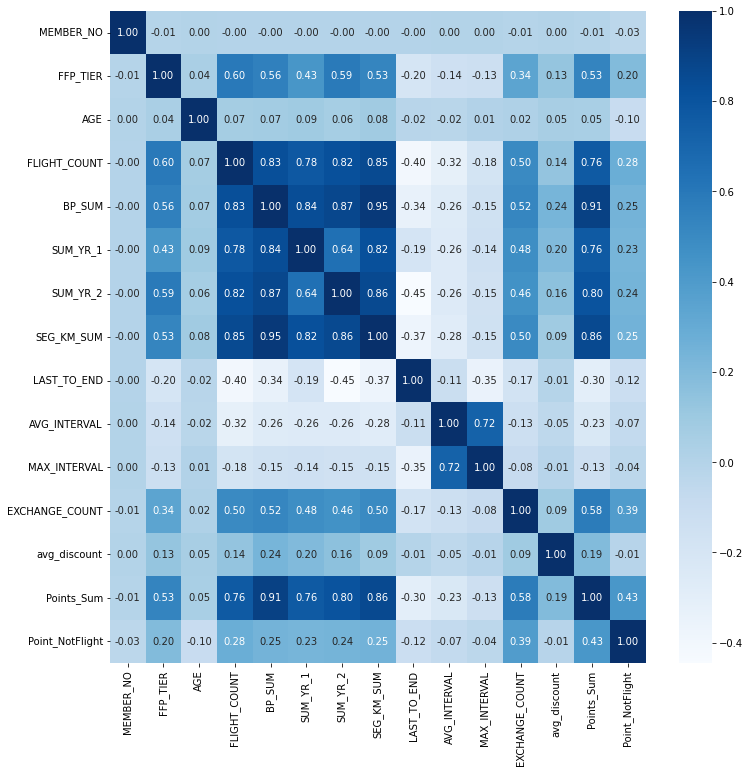

In [24]:
# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# Data Pre-Processing

## 1. Handling Missing Values

In [25]:
#Checking missing value
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  1
FFP_TIER                0
WORK_CITY            2102
WORK_PROVINCE        3019
WORK_COUNTRY           23
AGE                   389
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              542
SUM_YR_2              134
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [26]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [27]:
# Handling Missing Value
df = df.drop(['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'], axis=1)

In [28]:
df.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## 2. Handling Duplicate Values

In [29]:
# Check Duplicate 
df.duplicated().sum()

0

## 3. Feature Engineering

In [30]:
# change to datetime

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          60041 non-null  int64         
 1   FFP_DATE           60041 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 3   FFP_TIER           60041 non-null  int64         
 4   AGE                60041 non-null  float64       
 5   LOAD_TIME          60041 non-null  datetime64[ns]
 6   FLIGHT_COUNT       60041 non-null  int64         
 7   BP_SUM             60041 non-null  int64         
 8   SUM_YR_1           60041 non-null  float64       
 9   SUM_YR_2           60041 non-null  float64       
 10  SEG_KM_SUM         60041 non-null  int64         
 11  LAST_FLIGHT_DATE   59640 non-null  datetime64[ns]
 12  LAST_TO_END        60041 non-null  int64         
 13  AVG_INTERVAL       60041 non-null  float64       
 14  MAX_IN

## 3. Outlier Handling

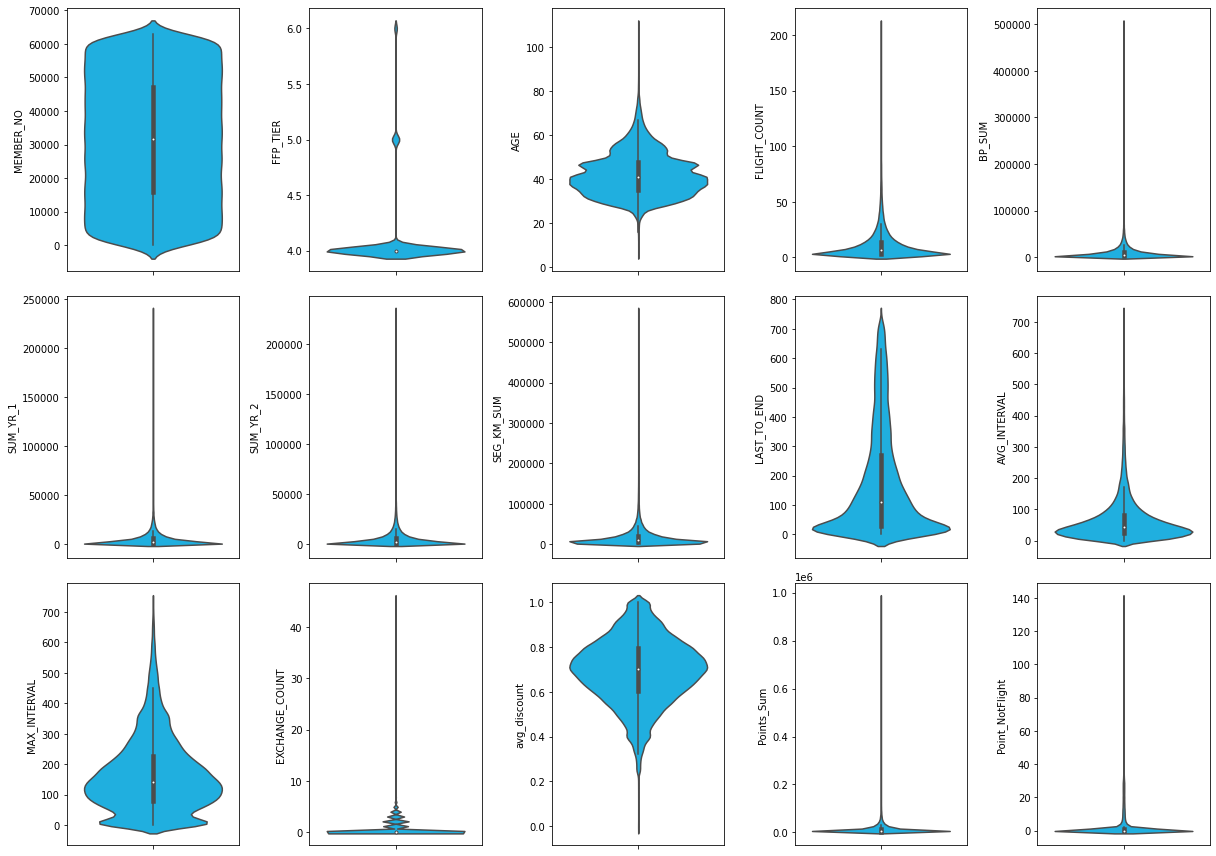

In [32]:
# boxplot

plt.figure(figsize = (17,12))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[numerical[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

In [33]:
# Handling Outlier using Z-score

print(f'Total Rows BEFORE Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in numerical:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling = {len(df)}')

Total Rows BEFORE Outlier Handling = 60041
Total Rows AFTER Outlier Handling = 52586


## 4. Feature Selection

Analisis LRFMC adalah *extended version* dari analisis RFM yang telah digunakan di industri penerbangan selama bertahun-tahun untuk membagi pelanggan menjadi beberapa segmen. Berdasarkan analisis LRFMC, kita akan membutuhkan 5 variabel:

- L (Length of joining member) : Jumlah bulan sejak awal keanggotaan anggota hingga akhir waktu observasi. => LOAD_TIME - FFP_DATE

- R (Recent flight) : Jumlah bulan sejak perjalanan terakhir anggota hingga akhir waktu observasi. => LAST_TO_END

- F (Flight Count) : Total berapa kali anggota melakukan perjalanan hingga akhir waktu observasi. => FLIGHT_COUNT

- M (Miles Accumulated) : Jarak (Mile) yang terakumulasi hingga akhir waktu observasi. => SEG_KM_SUM

- C (Discount Used) : Nilai rata-rata discount yang digunakan anggota selama periode pengamatan. => avg_discount

In [34]:
# create new feature

df['L'] = df['LOAD_TIME'] - df['FFP_DATE']
df['R'] = df['LAST_TO_END']
df['F'] = df['FLIGHT_COUNT']
df['M'] = df['SEG_KM_SUM']
df['C'] = df['avg_discount']

<ipython-input-34-c3a62bd16a85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L'] = df['LOAD_TIME'] - df['FFP_DATE']
<ipython-input-34-c3a62bd16a85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R'] = df['LAST_TO_END']
<ipython-input-34-c3a62bd16a85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [35]:
# ambil feature L, R, F, M, C saja

df_cust = df[['L', 'R', 'F', 'M', 'C']]
df_cust

,L,R,F,M,C
1486,1561 days,41,18,76005,0.786950
1490,1686 days,69,9,74714,0.799971
1508,1118 days,57,10,75964,0.781936
1594,1534 days,1,37,77711,0.746389
1609,2190 days,121,12,75167,0.768661
...,...,...,...,...,...
62965,1942 days,418,2,368,0.750000
62966,627 days,412,2,368,0.750000
62974,3249 days,89,2,368,0.710000
62975,1961 days,121,2,368,0.670000


In [36]:
# cek dytpes

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52586 entries, 1486 to 62978
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   L       52586 non-null  timedelta64[ns]
 1   R       52586 non-null  int64          
 2   F       52586 non-null  int64          
 3   M       52586 non-null  int64          
 4   C       52586 non-null  float64        
dtypes: float64(1), int64(3), timedelta64[ns](1)
memory usage: 2.4 MB


In [37]:
# change dataype of L to integer (timedelta -> str -> int)

df_cust['L'] = df_cust['L'].astype(str)

<ipython-input-37-77ab09d399cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['L'] = df_cust['L'].astype(str)


In [38]:
df_cust['L'] = df_cust['L'].str.split().str[0]

<ipython-input-38-08dc9c325b41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['L'] = df_cust['L'].str.split().str[0]


In [39]:
df_cust['L'] = df_cust['L'].astype(int)

<ipython-input-39-bbcb4ae746ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['L'] = df_cust['L'].astype(int)


In [40]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52586 entries, 1486 to 62978
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       52586 non-null  int64  
 1   R       52586 non-null  int64  
 2   F       52586 non-null  int64  
 3   M       52586 non-null  int64  
 4   C       52586 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.4 MB


Summary:

Distribusi pelanggan banyak terpusat di umur produktif (27 – 55 tahun). Hal ini bisa menjadi insight bahwa pelanggan melakukan perjalanan bisnis
Pelanggan Loyal bisa dilihat dari pembagian flight count per tahun menjadi member
Pelanggan lama bisa dilihat dari tanggal data diambil dikurang FFP join date
Feature yang tidak ada akan ditambahkan dalam feature engineering

## 5. Standarization

In [41]:
std = StandardScaler()
custvalue_std = std.fit_transform(df_cust)
custvalue_std

array([[ 0.14395292, -0.78397394,  0.9335119 ,  4.90118161,  0.65132087],
       [ 0.29369062, -0.63444093, -0.07903104,  4.79945954,  0.74271167],
       [-0.3867175 , -0.69852651,  0.03347373,  4.89795108,  0.61613104],
       ...,
       [ 2.16601084, -0.52763164, -0.86656444, -1.05850239,  0.11126705],
       [ 0.62311356, -0.35673676, -0.86656444, -1.05850239, -0.16946435],
       [-0.42984196,  0.50307805, -0.86656444, -1.02761544, -2.90659546]])

In [42]:
dfcust_std = pd.DataFrame(custvalue_std, columns = df_cust.columns)
dfcust_std.head()

,L,R,F,M,C
0,0.143953,-0.783974,0.933512,4.901182,0.651321
1,0.293691,-0.634441,-0.079031,4.799460,0.742712
2,-0.386717,-0.698527,0.033474,4.897951,0.616131
3,0.111610,-0.997593,3.071103,5.035603,0.366655
4,0.897433,-0.356737,0.258483,4.835153,0.522968


# Unsupervised Machine Learning, Clustering: K-Means

In [43]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(dfcust_std)
    inertia.append(kmeans.inertia_)

<AxesSubplot:>

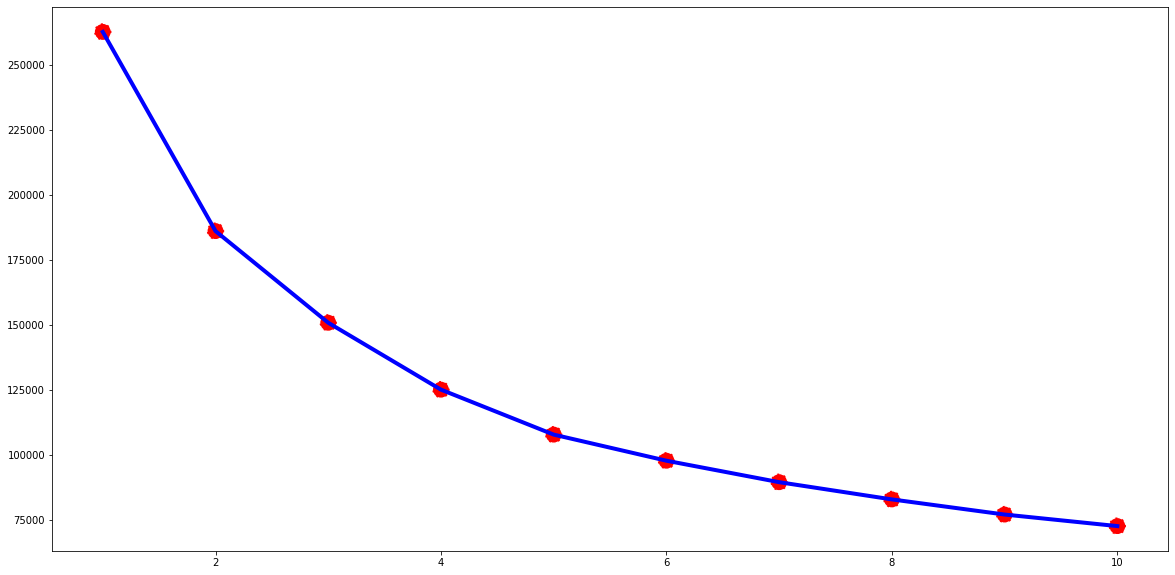

In [44]:
# Lihat inertia plot untuk menentukan jumlah cluster (Elbow Method)

plt.figure(figsize=(20,10))

sns.lineplot(x=range(1,11), y = inertia, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(1,11), y = inertia, s = 300, color = 'red', linestyle = '--')

In [45]:
# cluster n=4
kmeans = KMeans(n_clusters = 4, random_state = 0)

# fit model
kc = kmeans.fit(dfcust_std)
cluster_labels = kc.labels_

# add cluster
datacust_cluster = dfcust_std.assign(K_Cluster = cluster_labels)
datacust_cluster.sample(5)

,L,R,F,M,C,K_Cluster
23903,-0.459789,0.241395,-0.304041,-0.438794,1.324255,1
47420,-0.649058,1.336191,-0.641555,-0.849858,-0.836201,2
35504,-0.888638,1.870237,-0.866564,-0.778629,2.146570,2
15896,-0.657443,-0.960209,-0.079031,-0.005904,0.840336,1
28374,-0.676610,-0.842719,-0.641555,-0.569196,1.267054,1


In [46]:
# add cluster to df_cust
cust_cluster = df_cust.assign(K_Cluster = cluster_labels)
cust_cluster.head()

,L,R,F,M,C,K_Cluster
1486,1561,41,18,76005,0.786950,0
1490,1686,69,9,74714,0.799971,0
1508,1118,57,10,75964,0.781936,0
1594,1534,1,37,77711,0.746389,0
1609,2190,121,12,75167,0.768661,0


## PCA

In [47]:
pca = PCA(n_components=2)

pca.fit(datacust_cluster)
pcs = pca.transform(datacust_cluster)

In [48]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = datacust_cluster['K_Cluster']
data_pca.sample(10, random_state=123)

,PC 1,PC 2,cluster
29892,0.131678,-1.186503,1
41645,-0.336346,-0.194495,1
11810,1.170430,-0.650946,1
32439,-1.129930,0.264797,2
33842,-0.268424,-0.624800,1
18236,-0.478877,2.282914,3
52129,-0.882802,-1.953957,1
44645,-2.269311,-0.167541,2
2133,3.433517,0.980586,0
8010,1.102099,-0.930809,1


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

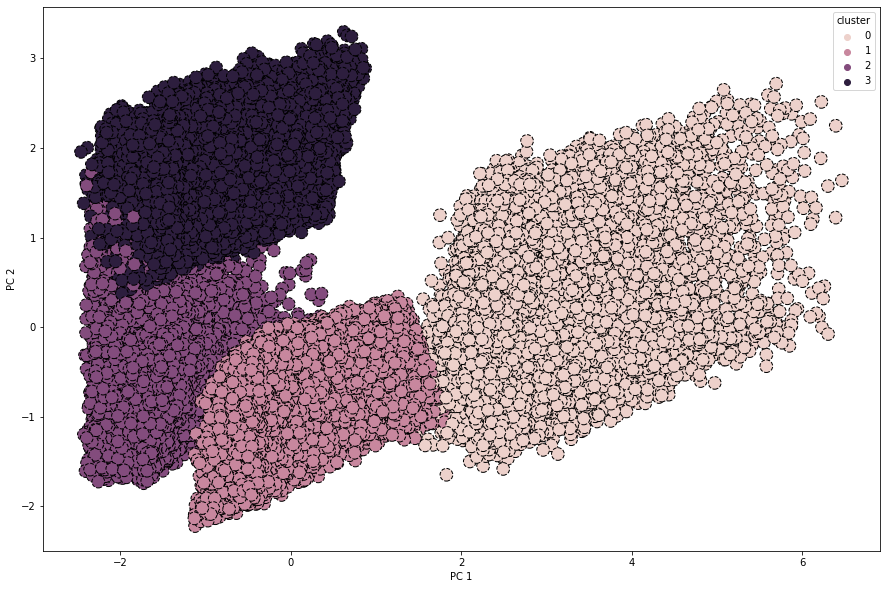

In [49]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax
)

# Model Analysis

## Distribution

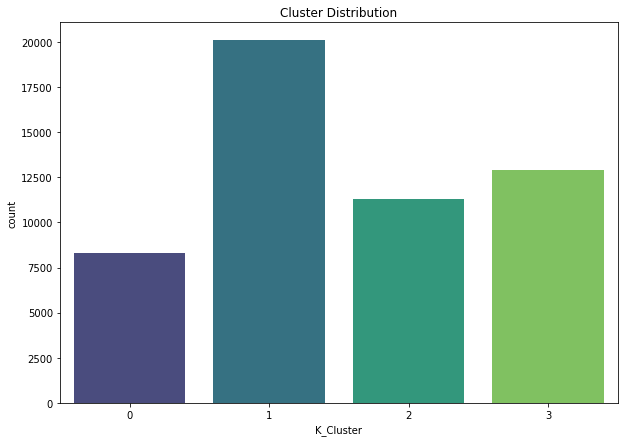

In [50]:
plt.figure(figsize=(10,7))
pl = sns.countplot(x = cust_cluster['K_Cluster'], palette='viridis')
pl.set_title('Cluster Distribution')
plt.show()

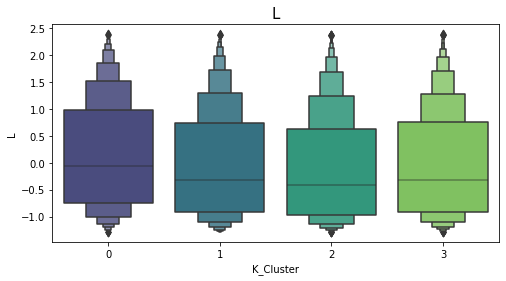

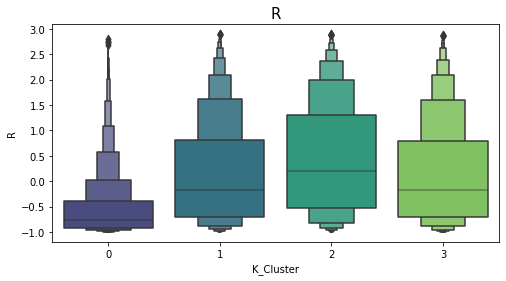

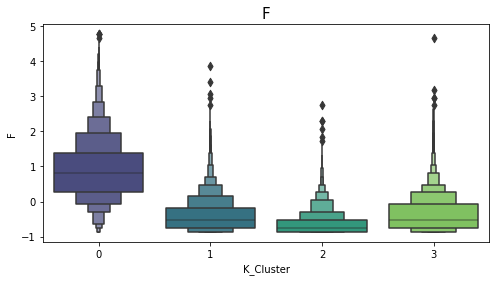

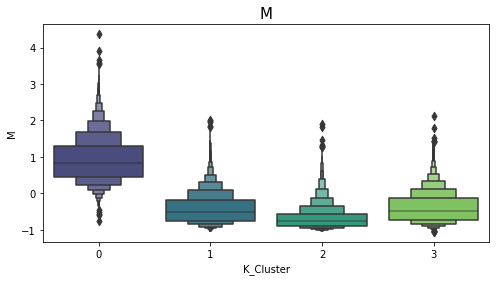

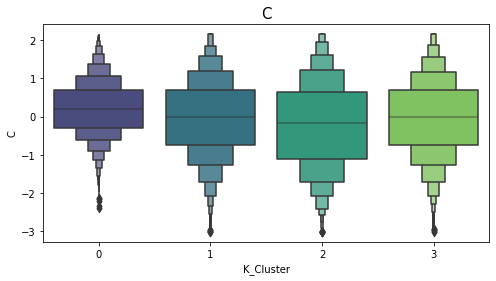

In [51]:
for i in df_cust.columns:
  plt.figure(figsize=(8,4))
  pl = sns.boxenplot(x = cust_cluster['K_Cluster'], y = datacust_cluster[i], palette='viridis')
  pl.set_title(i, fontsize=15)
plt.show()

In [52]:
cust_cluster.sample(10)

,L,R,F,M,C,K_Cluster
30737,740,347,7,10177,0.709806,2
17959,2532,21,13,19007,0.717155,3
6458,3292,9,28,43670,0.670539,0
49272,567,443,4,4595,0.625637,2
35550,2035,2,5,7237,0.795068,3
58709,1377,144,3,2904,0.505038,1
14029,2245,216,16,20879,0.807120,3
23142,676,70,16,12293,0.852558,1
29653,592,122,6,10677,0.712332,1
9677,376,83,15,42917,0.523244,0


In [53]:
# create pivot table K-Cluster aggregation

pivot_cc =  cust_cluster.groupby('K_Cluster').agg({'L': ['mean','median'],
                                                     'R': ['mean','median'],
                                                     'F': ['mean','median'],
                                                     'M': ['mean','median'],
                                                     'C': ['mean','median']}).reset_index()

In [54]:
pivot_cc

K_Cluster            L                   R                 F         \
                    mean  median        mean median       mean median   
0         0  1649.972379  1535.0   49.594812   25.0  26.004563   24.0   
1         1   860.074690   797.0  114.092317   96.0   7.605338    7.0   
2         2  1186.243756   978.0  488.576439  487.0   3.602480    3.0   
3         3  2433.846578  2393.0  128.454835  103.0   7.780847    7.0   

              M                  C            
           mean   median      mean    median  
0  36818.721028  34325.0  0.715935  0.714094  
1  10820.552208   9412.0  0.669370  0.678153  
2   5416.018158   4153.0  0.715294  0.725000  
3  10922.126416   9591.5  0.700152  0.706322

Karakteristik tiap Cluster berdasarkan LRFMC value:

Cluster 0 (The Most Loyal Customer)
- Member paling lama kedua setelah cluster 3.
- Kelompok dengan recency paling rendah (baru berpergian dengan moda udara).
- Kelompok dengan flying frequency paling tinggi (paling sering berpergian).
- Kelompok dengan jarak penerbangan paling jauh.

Cluster 1 (New Customer but Fly Often)
- Kelompok Member yang paling baru bergabung.
- Kelompok dengan recency paling rendah kedua (baru berpergian dengan moda udara).
- Kelompok dengan flying frequency medium.
- Kelompok dengan  jarak penerbangan medium.

3. Cluster 2 (Potential Churned Customer)
- Kelompok Member kedua yang paling baru bergabung.
- Kelompok dengan recency paling tinggi (Sudah lama tidak berpergian dengan moda udara).
- Kelompok dengan flight frequency paling rendah (Jarang sekali berpergian dengan moda udara).
- Kelompok dengan jarak penerbangan yang singkat.

4. Cluster 3 (Casual Customer)
- Kelompok member yang paling lama bergabung.
- Karakteristik Recency, Frequency, and flying distance dari cluster 3 ini hampir mirip/identik dengan cluster 1.

# Business Recommendation

Berdasarkan analisa di atas, pada akhirnya customer dibagi menjadi beberapa segmentasi/cluster dimana berdasarkan analisa tersebut, kami merekomendasikan perusahaan untuk memberikan benefit kepada customer sesuai dengan intensitas penerbangan mereka. Salah satunya seperti discount penerbangan/ free special waiting lounge dengan welcome drink/package dapat diberikan kepada 'the most loyal customer' sebagai bentuk benefit yang diberikan atas tingginya frekuensi penggunaan layanan penerbangan. Hal ini juga diharapkan dapat meningkatkan customer retention.

Reward yang bekerjasama/berafiliasi dengan perusahaan lain seperti grab/gojek seperti promo penggunaan transportasi dapat diberikan kepada cluster 1-3 tentunya dengan membedakan kuantitas reward yang diberikan. Hal ini diharapkan mampu meningkatkan jumlah customer baru.